In [1]:
import os
import sys
from shutil import copyfile

import IPython
import PyQt5.QtGui
import soundfile as sf
from matplotlib import pyplot as plt
from PyQt5 import QtCore
from PyQt5.QtCore import (QSize, Qt, QThread, QThreadPool,  # QRunnable
                          pyqtSignal)
from PyQt5.QtGui import QMovie, QPixmap
from PyQt5.QtWidgets import *
from PyQt5.QtWidgets import (QApplication, QLabel, QMainWindow, QPushButton,
                             QVBoxLayout, QWidget)

sth
2022-11-13 12:38:35.090020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 12:38:39.388866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 12:38:39.388975: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 12:38:39.709332: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 12:38:46.067810: W tensorflow/stream_executor/platfor

SystemExit: 0

/home/reza/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


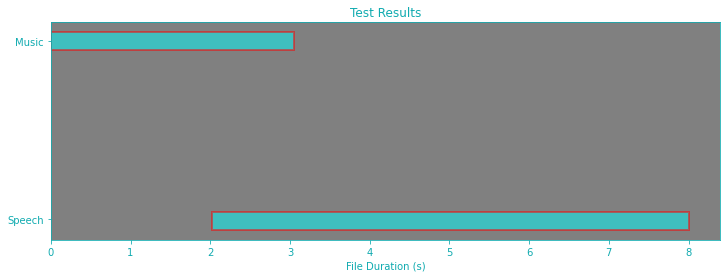

In [2]:
# 1. Subclass QThread
class Worker(QThread):
    progressChanged = pyqtSignal(int)
    def run(self):
        !python Music_Speech_Detection.py "example-1.wav" "example-1-preds.txt"
        
class Window(QMainWindow):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setWindowTitle("Voice Activity Detection (VAD)")
        self.setGeometry(50, 50, 1820, 850)
        self.setupUi()

    def setupUi(self):
        self.centralWidget = QWidget()
        self.setCentralWidget(self.centralWidget)
        
        font1 = PyQt5.QtGui.QFont()
        font1.setPointSize(16)
        
        font2 = PyQt5.QtGui.QFont()
        font2.setPointSize(28)
        
        # Create and connect widgets
        self.vbox = QVBoxLayout()
        
        # first hbox for kntu logo
        hbox1 = QHBoxLayout()
        self.image = QLabel(self)
        self.image.setPixmap(QPixmap('media/kntu2_10.png'))
        hbox1.addStretch()
        hbox1.addWidget((self.image))
        hbox1.addStretch()
        
        # second hbox
        hbox2 = QHBoxLayout()
        open_btn = QPushButton("Open File")
        open_btn.setStyleSheet("""
        QPushButton {
            background-color: #11abb0; 
            color: #2b2b2b;
            
                    }
        QPushButton:hover {
            background-color: #FF4500;
            color: #2b2b2b;
                            }
        """)#border: 1px solid black;##f06000
        open_btn.setFixedSize(QtCore.QSize(150, 50))
        open_btn.setFont(font1)
        open_btn.clicked.connect(self.OpenFile)
        
        
        test_btn = QPushButton("Test")
        test_btn.setStyleSheet("background-color: #11abb0; color: #2b2b2b")
        test_btn.setStyleSheet("""
        QPushButton {
            background-color: #11abb0; 
            color: #2b2b2b;
            
                    }
        QPushButton:hover {
            background-color: #FF4500;
            color: #2b2b2b;
                            }
        """)
        test_btn.setFixedSize(QtCore.QSize(150, 50))
        test_btn.setFont(font1)
        test_btn.clicked.connect(self.test)
        
        show_btn = QPushButton("Show Results")
        show_btn.setStyleSheet("background-color: #11abb0; color: #2b2b2b")
        show_btn.setStyleSheet("""
        QPushButton {
            background-color: #11abb0; 
            color: #2b2b2b;
            
                    }
        QPushButton:hover {
            background-color: #FF4500;
            color: #2b2b2b;
                            }
        """)
        show_btn.setFixedSize(QtCore.QSize(150, 50))
        show_btn.setFont(font1)
        show_btn.clicked.connect(self.show_result)
        
        
        hbox2.addStretch()
        hbox2.addWidget(open_btn)
        hbox2.addWidget(test_btn)
        hbox2.addWidget(show_btn)
        hbox2.addStretch()
        
        #third hbox test results
        hbox3 = QHBoxLayout()
        self.status_label = QLabel("")
        self.status_label.setText("<font color='#f06000'>Status:")#text</font> #f06000 #11abb0
        self.status = QLabel("")
        self.status.setText("<font color='#f06000'>Please Open a wav File")
        self.status_label.setFont(font2)
        self.status.setFont(font2)
        
        hbox3.addStretch()
        hbox3.addWidget(self.status_label)
        hbox3.addWidget(self.status)
        hbox3.addStretch()
        
        #fourth hbox -> image
        hbox4 = QHBoxLayout()
        self.result_image = QLabel(self)
        self.result_image.setPixmap(QPixmap('media/folder2.png'))
        hbox4.addStretch()
        hbox4.addWidget((self.result_image))
        hbox4.addStretch()
        
        # fifth hbox -> information
        hbox5 = QHBoxLayout()
        info1 = QLabel("")
        info1.setText("<font color='#11abb0'><br><br>Accurate Light weight Voice Activity Detection (VAD)\
                                            <br>Supervisor: Dr. Amirhossein Nikoofard\
                                            <br>Mentor: Navid Naderi (PhD candidate at K. N. Toosi University of Technology)\
                                            <br>Presented by Reza Golpayegani\
                                            <br>K. N. Toosi University of Technology    Fall 2022")#text</font> #f06000 #11abb0
        
        info1.setFont(font1)
        hbox5.addStretch()
        hbox5.addWidget(info1)
        hbox5.addStretch()
        
        # adding the hboxes to the main vbox
        self.vbox.addLayout(hbox1)
        self.vbox.addLayout(hbox3)
        self.vbox.addLayout(hbox2)
        self.vbox.addLayout(hbox4)
        self.vbox.addLayout(hbox5)
        self.centralWidget.setLayout(self.vbox)
    
    def OpenFile(self):
        try:
            os.remove("example-1.wav")
            os.remove("media/output.png")
            self.result_image.setPixmap(QPixmap('media/folder2.png'))
        except FileNotFoundError:
            pass
        
        url = QFileDialog.getOpenFileName(self, "Open a file", "", "All Files(*)")
        fileurl = url[0]
        temp_list = fileurl.split("/")
        file_name = temp_list[-1]
        copyfile(fileurl, "/mnt/e/github/vad/VAD/example-1.wav")
        self.status.setText("")
        self.status.setText("<font color='#f06000'>File opened successfully")
       
    def test(self):
        #print("salam")
        self.status.setText("")
        splash = SplashScreen('media/Comp-1.gif', Qt.WindowStaysOnTopHint)
        worker = Worker()
        #worker.progressChanged.connect(splash.updateProgress)
        worker.finished.connect(lambda: (splash.finish(window), window.show()))
        #worker.finished.connect(self.worker_finished)
                
        splash.show()
        worker.start()
        self.status.setText("")
        self.status.setText("<font color='#f06000'>File has been tested successfully")
        print("sth")
        
        
        
    def show_result(self):
        with open("example-1-preds.txt", "r") as f:
            lines = f.readlines()
            for line in lines:
                line_items = line.split()
                if line_items[2] == "speech":
                    start_speech = float(line_items[0])
                    end_speech = float(line_items[1])
                elif line_items[2] == "music":
                    start_music = float(line_items[0])
                    end_music = float(line_items[1])
                
            data1 = [start_speech,start_music]
            data2 = [end_speech-start_speech,end_music-start_music]


            f, ax = plt.subplots()

            ax.barh(range(len(data1)), data1, height=0.1, label='data 1', alpha=0.5, color='gray')
            ax.barh(range(len(data2)), data2, height=0.1, left=data1, label='data 2', alpha=0.5,
                    color='cyan', edgecolor='r', linewidth=2)#fff F06000 11abb0*
            
            ax.xaxis.label.set_color('#11abb0')
            ax.yaxis.label.set_color('#11abb0')
            
            ax.tick_params(axis='x', colors='#11abb0')    
            ax.tick_params(axis='y', colors='#11abb0') 
            
            ax.spines['bottom'].set_color('#11abb0')
            ax.spines['top'].set_color('#11abb0') 
            ax.spines['right'].set_color('#11abb0')
            ax.spines['left'].set_color('#11abb0')
            
            plt.sca(ax)
            plt.yticks([0.01, 1.002], ['Speech', 'Music'])
            plt.title("Test Results",color='#11abb0')
            plt.xlabel("File Duration (s)")
            ax.set_facecolor("gray")
            
            figure = plt.gcf()
            figure.set_size_inches(12, 4)
            plt.savefig("media/output.png", dpi = 100)
            self.result_image.setPixmap(QPixmap('media/output.png'))  
        
        
class SplashScreen(QSplashScreen):
    def __init__(self, filepath, flags=0):
        super().__init__(flags=Qt.WindowFlags(flags))
        self.movie = QMovie(filepath, parent=self)
        self.movie.frameChanged.connect(self.handleFrameChange)
        self.movie.start()

    def handleFrameChange(self):
        pixmap = self.movie.currentPixmap()
        self.setPixmap(pixmap)
        self.setMask(pixmap.mask())
        
        
app = QApplication(sys.argv)
window = Window()
window.setStyleSheet("QMainWindow {background: '#2b2b2b';}")
window.show()
sys.exit(app.exec())


